Average initial drop: -15.27%


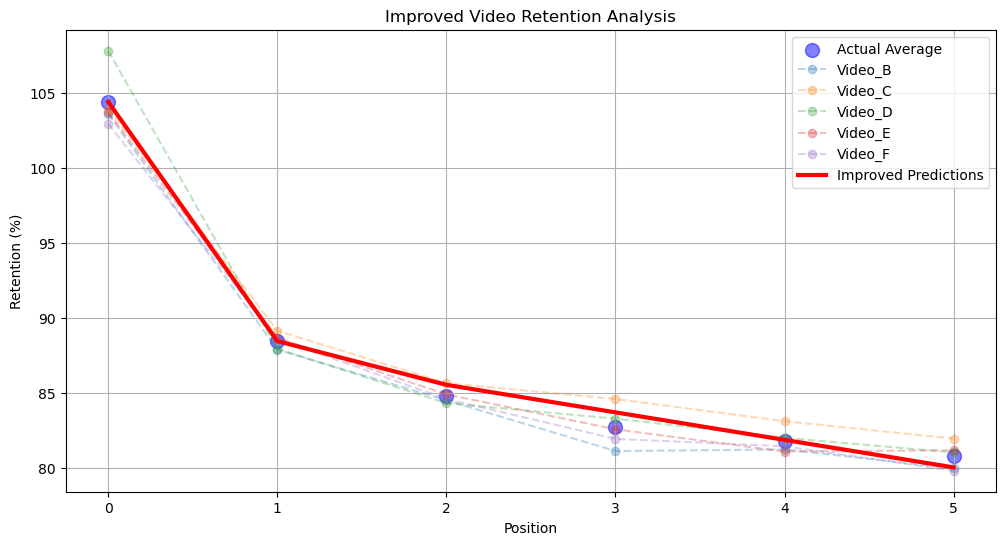


Improved Model Results:
--------------------------------------------------
Model Accuracy (R² Score): 99.46%

Predictions for Video A:
Position 0: 104.43%
Position 1: 88.48%
Position 2: 85.56%
Position 3: 83.73%
Position 4: 81.90%
Position 5: 80.06%

Drops Between Positions:
Drop 0 to 1: -15.95% (-15.27% change)
Drop 1 to 2: -2.91% (-3.29% change)
Drop 2 to 3: -1.83% (-2.14% change)
Drop 3 to 4: -1.83% (-2.19% change)
Drop 4 to 5: -1.83% (-2.24% change)


In [13]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Our video data
data = {
    'Position': [0, 1, 2, 3, 4, 5],
    'Video_B': [103.63, 87.91, 84.54, 81.15, 81.26, 80.00],
    'Video_C': [103.97, 89.17, 85.68, 84.62, 83.14, 81.98],
    'Video_D': [107.83, 87.97, 84.34, 83.31, 82.03, 81.06],
    'Video_E': [103.73, 88.70, 84.93, 82.60, 81.12, 81.20],
    'Video_F': [102.97, 88.64, 84.62, 81.96, 81.47, 79.84]
}

# Create DataFrame and calculate average
df = pd.DataFrame(data)
df['Average'] = df[['Video_B', 'Video_C', 'Video_D', 'Video_E', 'Video_F']].mean(axis=1)

# Calculate average initial drop (position 0 to 1)
initial_drop_percentage = (df['Average'][1] - df['Average'][0]) / df['Average'][0] * 100
print(f"Average initial drop: {initial_drop_percentage:.2f}%")

# Prepare data for positions 1-5 (after initial drop)
X = df['Position'][1:].values.reshape(-1, 1)
y = df['Average'][1:].values

# Train linear model on positions 1-5
model = LinearRegression()
model.fit(X, y)

# Generate predictions
all_positions = np.array([[0], [1], [2], [3], [4], [5]])
predictions = np.zeros(6)

# Position 0: Use average of actual position 0 values
predictions[0] = df['Average'][0]

# Position 1: Apply average initial drop
predictions[1] = predictions[0] * (1 + initial_drop_percentage/100)

# Positions 2-5: Use linear model
later_predictions = model.predict(all_positions[2:])
predictions[2:] = later_predictions

# Create visualization
plt.figure(figsize=(12, 6))

# Plot actual data
plt.scatter(df['Position'], df['Average'], color='blue', 
           label='Actual Average', s=100, alpha=0.5)

# Plot individual videos for reference
for video in ['Video_B', 'Video_C', 'Video_D', 'Video_E', 'Video_F']:
    plt.plot(df['Position'], df[video], 'o--', alpha=0.3, label=video)

# Plot our predictions
plt.plot(all_positions, predictions, 'r-', linewidth=3, 
         label='Improved Predictions')

plt.title('Improved Video Retention Analysis')
plt.xlabel('Position')
plt.ylabel('Retention (%)')
plt.grid(True)
plt.legend()
plt.show()

# Calculate accuracy (R² score)
accuracy = r2_score(df['Average'], predictions) * 100

# Print results
print("\nModel Results:")
print("-" * 50)
print(f"Model Accuracy (R² Score): {accuracy:.2f}%")

print("\nPredictions for Video A:")
for pos, pred in enumerate(predictions):
    print(f"Position {pos}: {pred:.2f}%")

print("\nDrops Between Positions:")
for i in range(1, 6):
    drop = predictions[i] - predictions[i-1]
    drop_percentage = (drop / predictions[i-1]) * 100
    print(f"Drop {i-1} to {i}: {drop:.2f}% ({drop_percentage:.2f}% change)")